# 기본 설정

In [1]:
# 코랩 한글 설정 실행 후 런타임 다시 시작 하고 
# 밑에 셀 부터 실행하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 !!!!!!!!!!
# 이걸 쫌 보고 하자 ㅋㅋ 맨날 까먹냐 ! (나에게 하는 말입니다...😅)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (16.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rc('font' , family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'
# # plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.size'] = 16
# plt.rcParams['figure.figsize'] = 20, 10
# plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 한국어 관련 파이썬 패키지
!pip install konlpy
# 워드클라우드
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.7 MB/s 
     |████████████████████████████████| 465 kB 43.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pytagcloud
!pip install pygame
!pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 5.2 MB/s 
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759869 sha256=e24b313ca93eab082f0b6e9094d548534e604d33d27f7ca193f934e0c5928839
  Stored in directory: /root/.cache/pip/wheels/fc/fd/aa/86956a295a7c9205bafd518ef4b6d489e51d2d476990c18238
Successfully built pytagcloud
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 5.2 MB/s 


In [4]:
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드
from wordcloud import WordCloud
import pytagcloud
from collections import Counter
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 데이터

In [5]:
# 리뷰데이터
# a = pd.read_csv('데이터 경로')
a.drop(['label'], axis = 1, inplace=True)

# 인덱스 1번부터 정리 (내가 보기 쉽게 정리)
a.index = a.index+1
a.head(3)

,reviews
1,만족합니다 괜찮습니다 재구매합니다
2,뭔가 고기를 먹이려는데 없을때 볶아주면 딱이예요
3,오버쿡 되지 않도록 조리하면 촉촉하니 맛있어요 월남쌈에도 넣어먹구 스리라차에도 찍어...


In [6]:
# 전체 리뷰중 삼천개만 선택 (너무 많음..)
a1 = a.iloc[0:3000]
a1.head()

,reviews
1,만족합니다 괜찮습니다 재구매합니다
2,뭔가 고기를 먹이려는데 없을때 볶아주면 딱이예요
3,오버쿡 되지 않도록 조리하면 촉촉하니 맛있어요 월남쌈에도 넣어먹구 스리라차에도 찍어...
4,믿고먹음 좋아요 부드럽고
5,세일해서 사뫘어요 ㅎ


## 한글 정제

In [7]:
# 결측제거 → 중복제거 → 인덱스재설정(리셋)
def getDataClean( df ):
    df = df.dropna()
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

getDataClean(a1)
a1 = getDataClean(a1)
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2973 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


In [8]:
import re

def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')    
    result = hangul.sub('', text)
    return result

a1['reviews'] = a1['reviews'].apply(lambda x : text_cleaning(x))
a1.head()

,reviews
0,만족합니다 괜찮습니다 재구매합니다
1,뭔가 고기를 먹이려는데 없을때 볶아주면 딱이예요
2,오버쿡 되지 않도록 조리하면 촉촉하니 맛있어요 월남쌈에도 넣어먹구 스리라차에도 찍어...
3,믿고먹음 좋아요 부드럽고
4,세일해서 사뫘어요 ㅎ


# Okt()
- 트위터에서 개발한 트위터 한국어 처리기에서 파생된 오픈소스(아파치 2.0라이센스)한국어 처리기

In [9]:
# 트위터에서 개발한 트위터 한국어 처리기에서 파생된 오픈소스(아파치 2.0라이센스)한국어 처리기
okt = Okt()

## 테스트

In [10]:
# 형태소
okt.morphs('헐 내가 이걸 성공시켜???')

['헐', '내', '가', '이', '걸', '성공', '시켜', '???']

In [11]:
# 품사별
okt.pos('너무 맛있어요')

[('너무', 'Adverb'), ('맛있어요', 'Adjective')]

In [12]:
# 어구
okt.phrases('헐 내가 이걸 성공시켜???')

['이걸', '이걸 성공', '성공']

In [13]:
# 품사 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

## 내가 원하는 품사만 

- 품사별로 분리를 하고 
- 원하는 품사만 따로 뽑아내자



---



In [14]:
# 테스트로 하나의 리뷰를 가지고 품사 확인

okt.pos(a1['reviews'][3])

[('믿고', 'Verb'), ('먹음', 'Noun'), ('좋아요', 'Adjective'), ('부드럽고', 'Adjective')]

In [15]:
# 리뷰
sent_df = a1['reviews']
type(sent_df)

pandas.core.series.Series



---



# 키워드 + 워드클라우드

## 품사별로 뽑아서 담고

In [16]:
from IPython.display import clear_output
from tqdm import tqdm

# 품사별 담을 리스트
sent_tag = []
# 진행상황 보고싶어서
cnt = 0

for sentence in tqdm(sent_df):
  cnt +=1
  
  morph = okt.pos(sentence)
  sent_tag.append(morph)

  clear_output(wait=True)
  print(f'수집중{cnt}')

  # print(morph)
  # print('-'*30)

# clear_output(wait=True)
print(f'수집된 sent_tag 개수 : {len(sent_tag)}')
print('수집완료')

100%|██████████| 2973/2973 [00:34<00:00, 87.14it/s] 

수집중2973
수집된 sent_tag 개수 : 2973
수집완료


## 키워드 
- 내가 원하는 동사, 형용사, 부사만 뽑아내기

In [17]:
cnt2 = 0
# 동사, 형용사, 부사인 품사만 리스트에 담기
word_vaa = []

for sentence1 in tqdm(sent_tag):
  cnt2 += 1
  for word, tag in tqdm(sentence1):
    if tag in ['Verb','Adjective', 'Adverb']:
      word_vaa.append(word)

      clear_output(wait=True)
      print(f'수집중{cnt2}')

clear_output(wait=True)
print(f'수집된 단어 개수 : {len(word_vaa)}')
print('수집완료')      

수집된 단어 개수 : 9960
수집완료


In [18]:
# 단어에 대한 빈도수 계산
sent_count2 = Counter(word_vaa)

# 빈도수가 가장 많은 단어 10개 선정
rank_sent_tag2 = sent_count2.most_common(10)
rank_sent_tag2

[('맛있어요', 620),
 ('좋아요', 354),
 ('너무', 234),
 ('재구매', 168),
 ('할', 133),
 ('먹어', 124),
 ('맛있어서', 123),
 ('다', 114),
 ('했어요', 112),
 ('잘', 112)]

In [19]:
# 단어 : 숫자로 나오는 부분을
# [ #단어 ]형태로 바꿔주기 / 해시태그처럼

dict_sent = dict(Counter(word_vaa).most_common(10))

# dict 키와 값으로 되어있은깨
for j in dict_sent.keys():
    print('#' + j)

# 이렇게 하면 나오나?


#맛있어요
#좋아요
#너무
#재구매
#할
#먹어
#맛있어서
#다
#했어요
#잘


## 워드클라우드
- 명사로만

In [20]:
cnt2 = 0
# 동사, 형용사, 부사인 품사만 리스트에 담기
noun_adj = []

for sentence1 in tqdm(sent_tag):
  cnt2 += 1
  for word, tag in tqdm(sentence1):
    if tag in ['Noun']:
      noun_adj.append(word)

      clear_output(wait=True)
      print(f'수집중{cnt2}')

clear_output(wait=True)
print(f'수집된 단어 개수 : {len(noun_adj)}')
print('수집완료')  

수집된 단어 개수 : 12605
수집완료


In [21]:
# 단어에 대한 빈도수 계산
sent_count3 = Counter(noun_adj)

# 빈도수가 가장 많은 단어 50개 선정
rank_sent_tag3 = sent_count3.most_common(50)

# 워드클라우드 단어 사전 만든다.
sent_tag_list3 = pytagcloud.make_tags(rank_sent_tag3)
rank_sent_tag3

[('맛', 682),
 ('닭', 561),
 ('가슴', 560),
 ('살', 459),
 ('구매', 315),
 ('때', 180),
 ('갈릭', 180),
 ('먹기', 153),
 ('다이어트', 152),
 ('샐러드', 150),
 ('진짜', 126),
 ('청양고추', 119),
 ('요', 114),
 ('제일', 110),
 ('큐브', 109),
 ('에프', 104),
 ('치즈', 102),
 ('주문', 99),
 ('에어', 99),
 ('냉동', 96),
 ('것', 92),
 ('더', 86),
 ('후기', 85),
 ('자주', 84),
 ('살이', 83),
 ('용', 80),
 ('조리', 76),
 ('최고', 76),
 ('거', 74),
 ('좀', 73),
 ('중', 71),
 ('제품', 68),
 ('항상', 66),
 ('구입', 65),
 ('또', 63),
 ('해', 60),
 ('일', 59),
 ('그냥', 59),
 ('늘', 59),
 ('프라이어', 59),
 ('아이', 53),
 ('카레', 53),
 ('추천', 52),
 ('쟁', 52),
 ('퍽퍽', 51),
 ('매콤', 49),
 ('정말', 48),
 ('요리', 46),
 ('단백질', 46),
 ('리지', 46)]

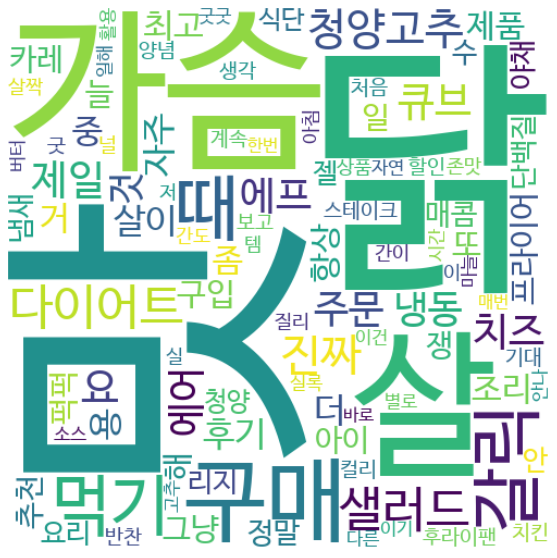

In [22]:
# 코랩 한글 폰트 경로 설정
font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=500, \
		height=500, \
		max_words=100, \
		max_font_size=300)

# 단어 빈도수
wc = wc.generate_from_frequencies(sent_count3)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



---

